In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import env
from hdm.dbm import DBM
from hdm.rbm import GaussianRBM, MultinomialRBM
from hdm.utils import (progress_bar, Stopwatch, RNG, 
                       im_plot, im_reshape, im_gif, tick_params,
                       plot_confusion_matrix)
from hdm.utils.augmentation import shift, horizontal_mirror
from hdm.utils.dataset import (load_cifar10, plot_cifar10, 
                               im_flatten, im_unflatten)

%matplotlib inline
%load_ext autoreload
%autoreload 2

## load CIFAR-10

In [3]:
X, y = load_cifar10(mode='train', path='../data/')
print X.shape, y.shape

(50000, 3072) (50000,)


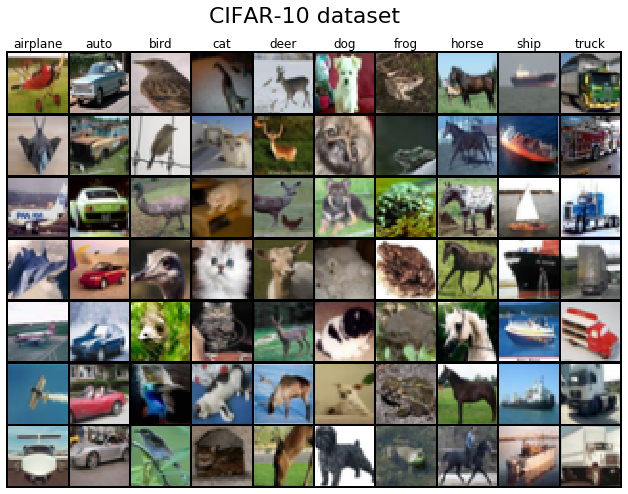

In [5]:
plt.figure(figsize=(11, 7.8))
plot_cifar10(im_unflatten(X[:1000]), y[:1000])
plt.savefig('cifar10.png', dpi=196)

## load augmented CIFAR-10

In [6]:
X_aug = np.load('../data/X_aug.npy')
print X_aug.shape, X_aug.dtype

(10000, 3072) uint8


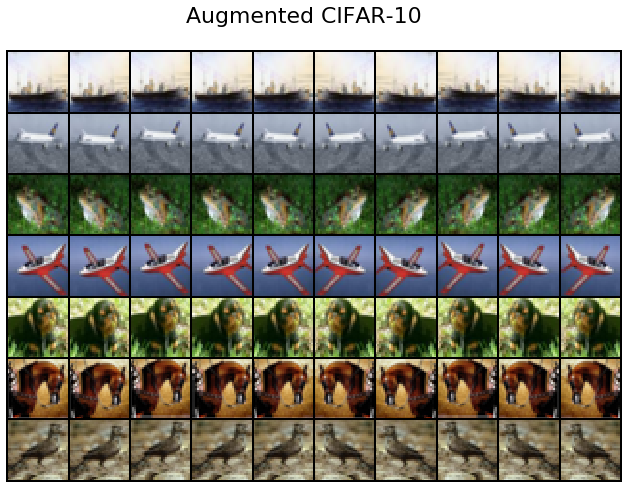

In [8]:
n_train = len(X_aug) / 10
ind = range(10 * n_train)
RNG(seed=1337).shuffle(ind)
imgs_id = [1, 2, 3, 20, 21, 22, 23]
shuffled_ind = []
for i in imgs_id:
    for k in xrange(10):
        shuffled_ind.append(ind.index(k * n_train + i))
Y = X_aug[shuffled_ind, ...]
Y = im_unflatten(Y)
fig = plt.figure(figsize=(11, 1.1*len(imgs_id)))
im_plot(Y, n_width=10, n_height=len(imgs_id), title='Augmented CIFAR-10', 
        title_params={'fontsize': 22});
plt.savefig('cifar10_aug.png', dpi=196)

## load and visualize filters of small RBM trained on 8x8 patches of images

INFO:tensorflow:Restoring parameters from ../models/rbm_cifar_small_18/model
(192, 300)


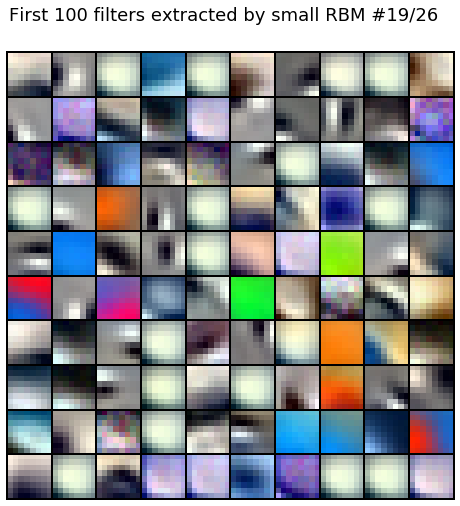

In [3]:
# load RBM weights
rbm_small = GaussianRBM.load_model('../models/rbm_cifar_small_18/')
rbm_small_W = rbm_small.get_tf_params(scope='weights')['W']
print rbm_small_W.shape

# prepare for plotting
rbm_small_W = rbm_small_W.T
rbm_small_W -= rbm_small_W.min(axis=1)[:, np.newaxis]
rbm_small_W /= rbm_small_W.ptp(axis=1)[:, np.newaxis] # -> [0; 1] range
rbm_small_W = im_unflatten(rbm_small_W) # -> (32, 32, 3)
rbm_small_W *= 255.
rbm_small_W = rbm_small_W.astype('uint8')

# plot
fig = plt.figure(figsize=(8, 8))
im_plot(rbm_small_W, title='First 100 filters extracted by small RBM #19/26', 
        title_params={'fontsize': 18})
plt.savefig('dbm_cifar_rbm_small.png', dpi=196);

## load trained G-RBM

In [ ]:
# load RBM weights
rbm_small = GaussianRBM.load_model('../models/rbm1_cifar/')
rbm_small_W = rbm_small.get_tf_params(scope='weights')['W']
print rbm_small_W.shape

# prepare for plotting
rbm_small_W = rbm_small_W.T
rbm_small_W -= rbm_small_W.min(axis=1)[:, np.newaxis]
rbm_small_W /= rbm_small_W.ptp(axis=1)[:, np.newaxis] # -> [0; 1] range
rbm_small_W = im_unflatten(rbm_small_W) # -> (32, 32, 3)
rbm_small_W *= 255.
rbm_small_W = rbm_small_W.astype('uint8')

# plot
fig = plt.figure(figsize=(8, 8))
im_plot(rbm_small_W, title='First 100 filters extracted by small RBM #19/26', 
        title_params={'fontsize': 18})
plt.savefig('dbm_mnist_rbm_.png', dpi=196);